In [6]:
import cubeit.DMs as dms
import numpy as np
import matplotlib.pyplot as plt
from cubeit.gates_DMs import (
    h, s, t, x, y, z, # simple single-qubit gates
    phase, rotation_x, rotation_y, rotation_z, # parameterised single-qubit gates
    cnot, cnot_10, swap, cz, # two-qubit gates
)

## Prepare a state in $|00\rangle$

In [26]:
state = np.array([1.,0.,0.,0.], dtype=complex)
rho_00 = np.outer(state,state)
rho_00

array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]])

In [27]:
type(rho_00)

numpy.ndarray

Turn the density matrix into a DensityMatrix2Qubit object

In [28]:
rho = dms.DensityMatrix2Qubit(rho_00)

Apply an H gate to target qubit 0 to confirm it works as intended

In [29]:
rho.apply_single_qubit_gate(h(), 0)

In [30]:
print(rho)

DensityMatrix2Qubit(
[[0.5+0.j 0. +0.j 0.5+0.j 0. +0.j]
 [0. +0.j 0. +0.j 0. +0.j 0. +0.j]
 [0.5+0.j 0. +0.j 0.5+0.j 0. +0.j]
 [0. +0.j 0. +0.j 0. +0.j 0. +0.j]]
)


## Try out multi gate circuits

In [31]:
gates = [h(), s(), t(), rotation_x(np.pi/4), cnot()] # specify a sequence of gates
targets = [1, 0, 0, 1, 1] # specify the target qubits for each gate

In [32]:
rho_multi = dms.DensityMatrix2Qubit(rho_00) # create a new density matrix object to test multiple gates

In [33]:
rho_multi.apply_sequence(gates, targets) # apply a sequence of gates

In [34]:
rho_multi # print the final density matrix

DensityMatrix2Qubit(
[[0.5+0.j 0.5+0.j 0. +0.j 0. +0.j]
 [0.5+0.j 0.5+0.j 0. +0.j 0. +0.j]
 [0. +0.j 0. +0.j 0. +0.j 0. +0.j]
 [0. +0.j 0. +0.j 0. +0.j 0. +0.j]]
)

Try out the other method which applies a sequence of gates by first multiplying them all together

In [35]:
state_bell = 1/np.sqrt(2) * np.array([1,0,0,1])

rho_bell = np.outer(state_bell,state_bell)

In [36]:
bell = dms.DensityMatrix2Qubit(rho_bell)

bell.apply_sequence(gates,targets)
bell

DensityMatrix2Qubit(
[[ 0.25-1.38777878e-17j  0.25-1.38777878e-17j -0.25-1.38777878e-17j
   0.25+1.38777878e-17j]
 [ 0.25-1.38777878e-17j  0.25-1.38777878e-17j -0.25-1.38777878e-17j
   0.25+1.38777878e-17j]
 [-0.25+1.38777878e-17j -0.25+1.38777878e-17j  0.25+1.38777878e-17j
  -0.25-1.38777878e-17j]
 [ 0.25-1.38777878e-17j  0.25-1.38777878e-17j -0.25-1.38777878e-17j
   0.25+1.38777878e-17j]]
)

Clean the density matrices to eliminate small floats that appear during computation

In [37]:
bell.clean()
bell2.clean()

In [38]:
bell

DensityMatrix2Qubit(
[[ 0.25+0.j  0.25+0.j -0.25+0.j  0.25+0.j]
 [ 0.25+0.j  0.25+0.j -0.25+0.j  0.25+0.j]
 [-0.25+0.j -0.25+0.j  0.25+0.j -0.25+0.j]
 [ 0.25+0.j  0.25+0.j -0.25+0.j  0.25+0.j]]
)

## Try method which applies noise channels during the gate sequence.

In [39]:
noise_channels = {
    'depolarising': 0.01,
    'dephasing': 0.02,
    'amplitude damping': 0.03,
    'bit flip': 0.04,
    }  # specify noise channels and their probabilities

In [40]:
shots = [int(10**x) for x in np.linspace(0.5,4,11)] # specify a number of measurement shots
shots

[3, 7, 15, 35, 79, 177, 398, 891, 1995, 4466, 10000]

In [41]:
measurements, ideal = bell.measure_shots(shots) # measure with noise

In [42]:
print(ideal) # print out ideal measurement results without noise

{'00': 0.2499999999999999, '01': 0.2499999999999999, '10': 0.2499999999999999, '11': 0.2499999999999999}


In [43]:
measurements # print out noisy measurement results

[{'00': 0.0, '01': 0.3333333333333333, '10': 0.6666666666666666, '11': 0.0},
 {'00': 0.14285714285714285,
  '01': 0.14285714285714285,
  '10': 0.5714285714285714,
  '11': 0.14285714285714285},
 {'00': 0.06666666666666667,
  '01': 0.26666666666666666,
  '10': 0.26666666666666666,
  '11': 0.4},
 {'00': 0.17142857142857143,
  '01': 0.2857142857142857,
  '10': 0.2857142857142857,
  '11': 0.2571428571428571},
 {'00': 0.25316455696202533,
  '01': 0.25316455696202533,
  '10': 0.24050632911392406,
  '11': 0.25316455696202533},
 {'00': 0.3220338983050847,
  '01': 0.22033898305084745,
  '10': 0.2598870056497175,
  '11': 0.1977401129943503},
 {'00': 0.23869346733668342,
  '01': 0.2562814070351759,
  '10': 0.24874371859296482,
  '11': 0.2562814070351759},
 {'00': 0.2547699214365881,
  '01': 0.26936026936026936,
  '10': 0.244668911335578,
  '11': 0.23120089786756454},
 {'00': 0.2556390977443609,
  '01': 0.24661654135338346,
  '10': 0.2586466165413534,
  '11': 0.23909774436090225},
 {'00': 0.2599641

In [44]:
bitstrings = list(measurements[0].keys())

# Build dictionary: bitstring -> list of values across shot counts
data = {b: [res[b] for res in measurements] for b in bitstrings} # this collects the noisy data to plot

Plot how the noisy measurements evolve as we increase the number of measurement shots

(-0.1, 1.1)

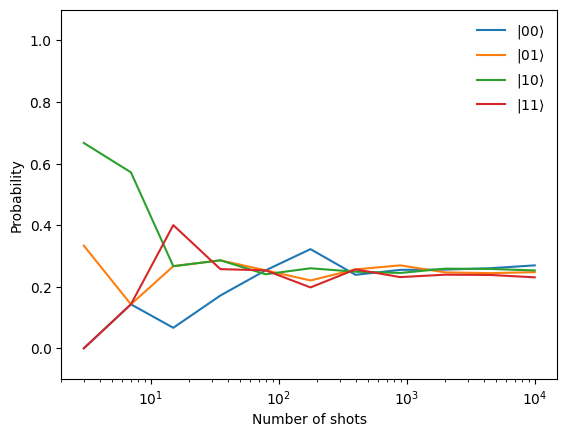

In [45]:
for b in bitstrings:
    plt.semilogx(shots, data[b], label=fr'|{b}$\rangle$')

plt.legend(frameon=0)
plt.xlabel('Number of shots')
plt.ylabel('Probability')
plt.ylim(-0.1,1.1)

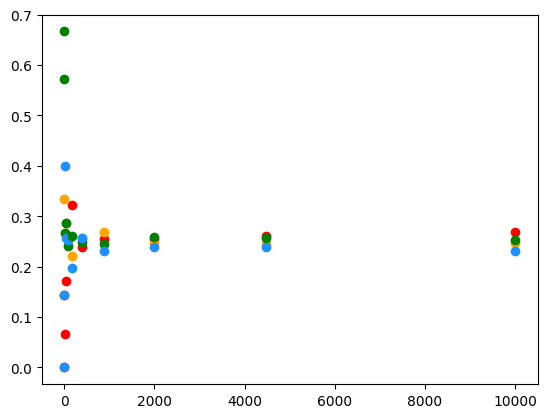

In [46]:
i = 0
for results in measurements:
    plt.scatter(shots[i], results['00'], color='red', label='00')
    plt.scatter(shots[i], results['01'], color='orange', label='01')
    plt.scatter(shots[i], results['10'], color='green', label='10')
    plt.scatter(shots[i], results['11'], color='dodgerblue', label='11')
    i += 1

# plt.legend()

In [1]:
noise_channels = {
    'depolarising': 0.01,
    'dephasing': 0.02,
    'amplitude damping': 0.03,
    'bit flip': 0.04,
    }  # specify noise channels and their probabilities

In [5]:
noise_channels['bit flip']

0.04

In [3]:
noise_channels

{'depolarising': 0.01,
 'dephasing': 0.02,
 'amplitude damping': 0.03,
 'bit flip': 0.04}